<div class="alert alert-info">
В блоках голубого цвета указаны комментарии лектора
    </div>

# **HW1 Basics in Molecular Biology**

## **0. Gene of interest**
<div class="alert alert-info">
    Our gene of interest is BRCA2
    </div>

## **0. Import**
<div class="alert alert-info">
    We need the *pyensembl* and *mygene* libraries to access databases containing information about the gene
    </div>

<div class="alert alert-info">
    All downloads take 10 minutes
    </div>

In [ ]:
!pip install pandas pyensembl mygene
!pyensembl install --release 107 --species homo_sapiens

In [2]:
import pyensembl
import pandas as pd
import mygene
import requests
import sys

## **1. Basic Gene Info**
### **30 points**

<div class="alert alert-info">
    Load information about our gene from the table using *mygene* package in the following cells. 

Also, all the data that we receive is available online in the NCBI resources  https://www.ncbi.nlm.nih.gov/
    </div>

In [3]:
mg = mygene.MyGeneInfo()
q = mg.querymany(qterms=['BRCA2'], scopes="symbol", species='human', as_dataframe=True, df_index=True, fields='all')
q

INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.


,AllianceGenome,HGNC,MIM,_id,_score,alias,entrezgene,exons,exons_hg19,generif,...,reporter.HG-U133_Plus_2,reporter.HG-U95Av2,reporter.HTA-2_0,reporter.HuEx-1_0,reporter.HuGene-1_1,reporter.HuGene-2_1,umls.cui,uniprot.Swiss-Prot,uniprot.TrEMBL,wikipedia.url_stub
query,,,,,,,,,,,,,,,,,,,,,
BRCA2,1101,1101,600185,675,17.604156,"[BRCC2, BROVCA2, FACD, FAD, FAD1, FANCD, FANCD...",675,"[{'cdsend': 32398770, 'cdsstart': 32316460, 'c...","[{'cdsend': 32972907, 'cdsstart': 32890597, 'c...","[{'pubmed': 11044354, 'text': 'Observational s...",...,"[208368_s_at, 214727_at]","[1503_at, 1989_at, 1990_g_at]",TC13000111.hg.1,"[3484641, 3484700]",7968484,16773840,C0598034,P51587,"[A0A7P0TAP7, H0YE37, A0A590UJI7, H0YD86, A0A59...",BRCA2


<div class="alert alert-info">
    As a result, we obtain a table containing a lot of useful information about the gene, collected from various resources. Let's select the columns with general information about the gene and see what's in them.
    </div>

In [4]:
cols=['symbol',
      'name',
      'alias', 
      'map_location',
      'type_of_gene',
      'summary',
      'generif'
      ]
q[cols]

,symbol,name,alias,map_location,type_of_gene,summary,generif
query,,,,,,,
BRCA2,BRCA2,BRCA2 DNA repair associated,"[BRCC2, BROVCA2, FACD, FAD, FAD1, FANCD, FANCD...",13q13.1,protein-coding,"Inherited mutations in BRCA1 and this gene, BR...","[{'pubmed': 11044354, 'text': 'Observational s..."


<div class="alert alert-info">
So, the **name** column contains the full name of this gene, and the **symbol** column contains the so-called *Hugo_symbol* of this gene - a widely used abbreviation for its designation, it is it that is indicated in your table

the **alias** column contains information about other variants of the gene abbreviations - this is very important, because one gene can have different abbreviations, and the bioinformatician must understand that we are talking about the same gene if sees it in any resource

The **map_location** column carries information about the "address" of the gene in the human genome: the first number indicates the number of the chromosome, the letter after it is the short (p) or long arm (q) of the chromosome, the numbers after the letter indicate the locus, that is, the position of the gene on the shoulder

The **type_of_gene** section contains information about what the product of this gene is, so if it says *protein-coding* it means the gene is encoding a protein. Remember that not all genes code for proteins: There are genes that code for RNA, such as tRNA or microRNA

The **summary** section contains a brief description of the function of the product of this gene from the *RefSeq* database (this is also called a functional annotation)

The **generif** column contains the titles and ID of the articles that mention our gene in the *Pubmed* database (this is the most famous agglomerator of indexed scientific literature, use it if you need to "google" something scientific and find a reliable literary source https:// pubmed.ncbi.nlm.nih.gov/
    </div>


# ***Answer the questions, section 1***
### 1) On which chromosome is this gene located? (**5 points**)


Gene BRCA2 locateg on 13th chromosome

### 2) How do you think, is this gene a *tumor suppressor* (suppresses tumor development in any molecular way) or an *oncogene* (participates in tumor development, as it promotes cell growth, proliferation, survival)? Explain your answer. 
### The summary column can help you to make a conclusoin, or you can google your gene to find out more info (do not forget to use Pubmed for this!) (**15 points**)

The BRCA2 gene is a tumor suppressor gene. This means that it plays a significant role in preventing the development of tumors and oncological diseases. BRCA2 functions by controlling DNA repair and assisting in the restoration of damaged DNA segments. This gene ensures genome stability and prevents unwanted changes in DNA that can lead to cancer.

Mutations in the BRCA2 gene can impact its normal function and reduce the body's ability to combat DNA damage. This increases the risk of developing breast cancer, ovarian cancer, and other types of cancer. Therefore, when functioning normally, BRCA2 acts as a tumor suppressor gene, preventing cancer. However, mutations in it can alter this role and contribute to cancer development.

### 3) Add here a link to the last review that mentions this gene (you may need to go to https://pubmed.ncbi.nlm.nih.gov/, enter the name of the gene in the search and specify the 'Review' type of paper filter as well as search time) (**10 point**)

https://pubmed.ncbi.nlm.nih.gov/37132126/

# **2. Transcripts and gene products**
## **40 points**

<div class="alert alert-info">
    One gene can encode many mRNA transcripts (remember what mechanisms provide this?) Sometimes it is important for us to know how many possible transcripts a gene has, what they are, how they differ.

The Enseml database stores information about the number of transcripts and products of each gene, as well as their sequence.
    </div>

In [ ]:
ensembl = pyensembl.EnsemblRelease(release=107)

<div class="alert alert-info">
    Let's display the IDs of all transcripts encoded by our gene
    </div>

In [ ]:
ensembl.transcript_ids_of_gene_name('BRCA2')

<div class="alert alert-info">
    Now we can figure out the sequence of any of these transcripts
    </div>

In [ ]:
ensembl.transcript_sequence('ENST00000544455')

<div class="alert alert-info">
    We can also find out the sequence of the protein that is encoded by this particular transcript
    </div>

In [ ]:
# this is a function to obtain protein sequence corresponding to the transcipt name from the server of interest
server = "https://rest.ensembl.org"
def get_protein(tx_id):
    ext = f"/sequence/id/{tx_id}?type=protein;multiple_sequences=1"

    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})

    if not r.ok:
        r.raise_for_status() 

    return r.json()[0]['seq']

In [ ]:
get_protein(tx_id='ENST00000544455')

<div class="alert alert-info">
    We can also learn about the molecular function of a given gene, the molecular pathways it is involved in, and the location of the gene product in the cell. All this information is stored in various databases - Gene Onthology (GO), Reactome, Kegg, Wiki Let's use one of the most popular of them - Gene Onthology
    </div>

In [ ]:
q.loc['BRCA2']['go.BP'][0:3]

In [ ]:
q.loc['BRCA2']['go.MF'][0:3]

In [ ]:
q.loc['BRCA2']['go.CC'][0:3]

## Uniprot
<div class="alert alert-info">
    In the Uniprot database, which accumulates information about proteins, all of this can be found, and there is a wonderful graphical interface available. For example, you can find visualizations of a protein's cellular localization, where the protein's location within the cell is highlighted.

https://www.uniprot.org/

Enter the name of the protein here and go to the page dedicated to it (you may have to specify which protein product you need - watch the organism you choose - we need Homo sapience)
    </div>

### GO annotation in Uniprot

<div class="alert alert-info">
    In the keywords section you will find GO summaries on the main pathways and molecular functions of the protein
    </div>

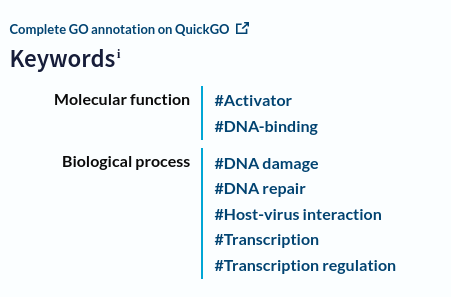

<div class="alert alert-info">
    Here below in the section Cellular Sublocation you will find a beautiful visualization of the cellular localization of the protein - in case you suddenly forgot the components of the cell
    </div>


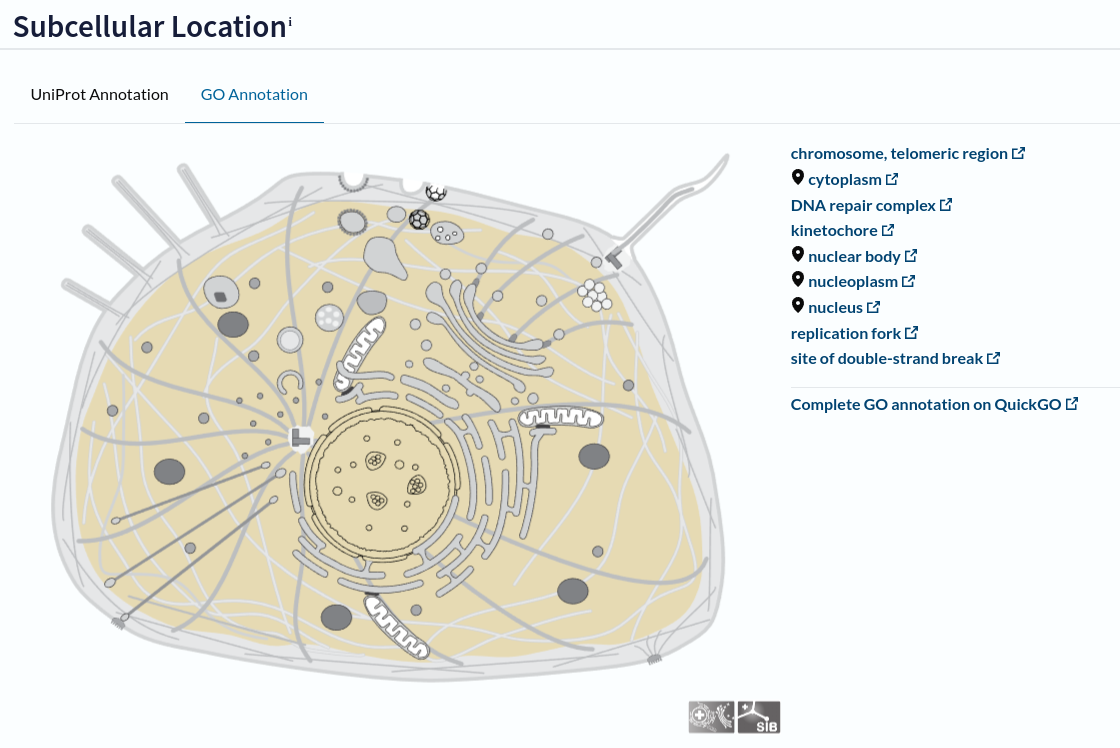

<div class="alert alert-info">
    In Uniprot, you can also find the spatial structure of a protein in the Structure section, predicted using AlphaFold2 or determined by ultrastructure methods. The image is interactive, you can "rotate" the molecule, aim at a certain part and highlight the position
    </div>
    
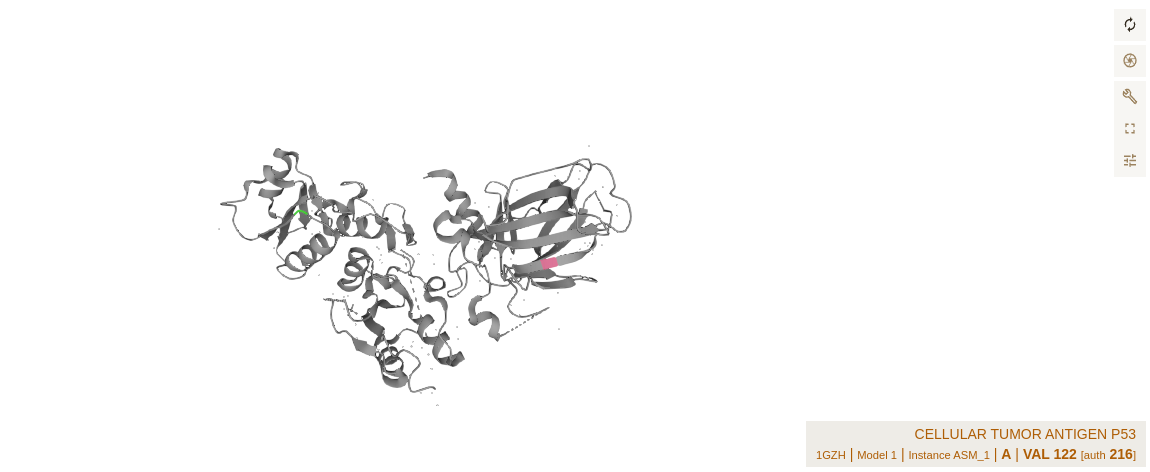

## ***Answer the questions, section 2***
### 1) How many transcripts are encoded by a gene? (**5 points**)


### 
There are 15 transcripts

### 2) Write the name and length of the largest transcript, as well as the length of the protein it encodes (**15 points**)


###
The largest transcript is "ENST00000380152". It's length is 11954.

### 3) What pathways does your protein participate in, according to GO-Terms? Give five different paths (**10 points**)

### 
1. DNA binding
2. Transferase activity
3. DNA repair
4. Anatomical structure development
5. nucleus

### 4) Where is the protein localized in the cell? How does this relate to the functions it perform? For example, if the protein is localized in the nucleus, this may be due to the fact that it is DNA-binding one, it could provide chromatin compaction etc. (**10 points**)


### 
The protein localized in the nucleus.
BRCA2 binds the single strand DNA and directly interacts with the recombinase RAD51 to stimulate and maintain strand invasion, a vital step of homologous recombination.

### 5) Attach a picture here showing the 3D structure of the protein. What domains are there in your protein? (**10 points**)

###
![protein](protein.png)

## ***Additional task (30 points)*** 
### Write a function to provide translation of mRNA transcript into aminoacid protein sequence
<div class="alert alert-info">
    The function must take a nucleotide sequence as input (for example, 'CCCGATCCGA') and convert it to an amino acid sequence
    </div>

In [1]:
from Bio.Seq import Seq

def translation_function(mRNA_sequence):
    """
    Translates an mRNA sequence into an amino acid sequence.

    :param mRNA_sequence: A string representing the mRNA sequence.
    :return: A string representing the translated protein sequence.
    """
    mRNA = Seq(mRNA_sequence)
    protein_sequence = mRNA.translate(to_stop=True)
    return str(protein_sequence)

In [2]:
with open('/home/elvira/BG BOOTCKAMP 2023/1/HW1_RNA.txt', 'r') as file:
    mRNA_sequence = file.read()
protein_sequence = translation_function(mRNA_sequence)
print(protein_sequence)

MRHCITSHELPTPLRNFLKSTKSQSLRANGTSVFRKVLYVANVTYMRWRWGSHCYVSHNGGCRESEVHVSPIVRSLGYETNDNTLRCGVLTFHVWRDSIFERVWNALRWSDVLCAKGTRRFCDYSPLSPKITRLDPGESAELHQFGGECQYVYCSICCLLESTPIDKRTLYMGFSFTSPALRQIRSASPAKGGLSYISTANSERSCVKYGVFSKAYGHKGSFCDSQTDTAVLVSTLALAGSNKNRRASCTTLRREPLRVYCCLTHQTVPTDRDTMIDRVHVFPLWYSRACRNAFSFCALWRARGYYFISNHNVIRLITDSTVYLMSLQYGSYQDSRVLSLRIITCSASQVVTACPVLDVNCLTDPSIRVGCRSPSLAPISEMVGANLLLLVYTTLRMAIATRCEARSNLGCWRYARSLMTVGAVRVVRCPSRSAHREEGDSGHAYIDTTSSTGQPCRPPELWKKHYGHATTLGVSHVRSPYSCLHPRRGVTRLRGYSTTYLCKPLTCPHGQPNYRTRYPLPRLFQDGSAFENVSAKESGALLEPKAARVHPATHVRKGEPESLLLLAAAVVDVRHIALTSKRTTNINKLLEEHSEFYICGGSGIRHALDSPHIQLHAGSELARIVVTHIIIIRGWIVDGGSVAGSYANCVLLHVSLARMIPHLVPPQTVKGTGDVVAYRQCYPVSATSQKSVKVLDDREYATLGRLARPSVVLPRRMDSHPAPKGAKRTAHALLRRLIVTRFDLYLAKESSGQKYKRRGRTSVSLKQPSRQLRTGIRIKWHSGRSTLSRSELKGRLVDRTLKLCGGTSRTDWGLNYQVKTRALVPPDYIRLASFILRVRQDSLSSKAPAVLTCAISEMAGLCLNQNSCYELPCTGCSADYRAARIRVLSLISFAEKLGDWVHLYRSRFDHAAMAWRVSRHTTPTLSDISLTECISPACSLVGLGFCPCMFNVTLIPLLPPYVGSSESSLASVLSWVLRDHMPNAHDHNGSRGGLFRYQSP

/home/elvira/mambaforge/lib/python3.10/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
